<a href="https://colab.research.google.com/github/voquangtuong/AAA_drought_prediction/blob/main/LSTM20210630_present_results_loop095.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phần 1: ví dụ mẫu

In [1]:
# multivariate multi-step stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from tensorflow.keras import backend as KK
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=5, verbose=0)
# demonstrate prediction
x_input = array([[70, 75], [80, 85], [90, 95]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[ 7.66539  10.693887]]


In [2]:
### plot ket qua
y_ORG=list(y.flatten().reshape(y.shape[0],y.shape[1])[:,0])
for i in range(1,y.shape[1]):
  # y_ORG=np.concatenate((y_ORG,y.flatten().reshape(y.shape[0],y.shape[1])[:,i]))
  y_ORG.append(y.flatten().reshape(y.shape[0],y.shape[1])[:,i][-1])
y_ORG

[65, 85, 105, 125, 145, 165, 185]

# Phần 2 : áp dụng cho correlation 1

In [3]:
# multivariate multi-step stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# # define input sequence
# in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
# in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
# out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# # convert to [rows, columns] structure
# in_seq1 = in_seq1.reshape((len(in_seq1), 1))
# in_seq2 = in_seq2.reshape((len(in_seq2), 1))
# out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns


In [4]:
# read data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/MyDrive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# tao thu muc chua anh xuat ra
out_dir_all=['output_fig_210630_095','output_tab_210630_095']
for out in out_dir_all:
  if not os.path.exists(out):
    os.makedirs(out)


,Date,Andong106,Ansan75,Ansoeng76,Asan25,Boeun13,Boryeong26,Boseong186,Buan170,Buan171,Bucheon78,Buk0
0,1/1/1981,-0.068793,0.007370,-0.043025,-0.016300,-0.135790,-0.085975,0.000382,0.010484,0.006280,0.018972,-0.013240
1,2/1/1981,-0.191194,-0.237572,-0.179815,-0.172738,-0.127369,-0.155773,-0.229314,-0.231227,-0.231224,-0.244268,-0.213504
2,3/1/1981,-0.928368,-1.075123,-0.868374,-0.933116,-0.607044,-0.720911,-1.047755,-1.076924,-1.058379,-1.096922,-0.959023
3,4/1/1981,-0.266323,-0.317591,-0.239929,-0.272606,-0.139844,-0.185271,-0.307400,-0.318330,-0.312773,-0.324719,-0.278742
4,5/1/1981,0.894040,1.404446,1.074264,0.735564,0.691685,0.904366,1.341124,1.301548,1.340194,1.487773,1.232452


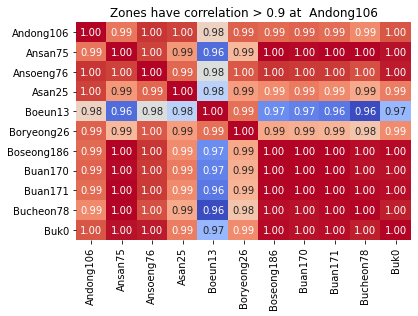

In [6]:


# df0=pd.read_csv('input_data/percentile_season_adj.csv')
# df0.head()
dataset1000=pd.read_csv("input_data/percentile_season_adj.csv")
# dataset0.describe()
# dataset00.head()
# # chuyen data tu 2001/01-2019/12
# dataset0=dataset00.iloc[6:-4,0:]
# dataset0.reset_index(drop=True,inplace=True)
# dataset0
# =============================================================================
# Arrange predicted column
list1 = dataset1000.columns.tolist()
# for k in range(1,len(list1)):
    #  check station 1
k=1  
list2=list1[0:1]+list1[k:]+list1[1:k]
# print(list2)
# Using indent to control loop of station
# dataset=dataset0[list2]
# dataset.describe()
# modified dataset
# print(list2)
# Using indent to control loop of station
# dataset100=dataset0[list2]
# dataset.describe()
dataset0=dataset1000[list2] # avoid dataset0 not change
corr = dataset0.corr()
df=corr
df2 = df[df.columns[((df.iloc[0,:])**2)**0.5 > 0.95]]
df2
list3=df2.columns.tolist()
list3.insert(0,'Date')
dataset=dataset0[list3]
dataset0=dataset # avoid dataset0 not change
fig0=plt.Figure()
plt.Figure(figsize=(8,6))
corr1 = dataset.corr()
# corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
# plt.title("Zones have correlation > 0.9 at  "+list1[k])
# plt.tight_layout()
# plt.savefig(output_fig+"\\"+list1[k]+"Corel"+".png",dpi=300)
fig, ax = plt.subplots()
sns.heatmap(dataset.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
# ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.title("Zones have correlation > 0.9 at  "+list1[k])
# plt.savefig(output_fig+"/"+list1[k]+"Corel"+".png",dpi=300, bbox_inches='tight', pad_inches=0.0)

# corr1.to_csv(output_table+"/"+list1[k]+"cor"+".csv")
dataset.to_csv('/content/drive/MyDrive/input_data/correl_in_Andong.csv')
dataset.head()

In [7]:
# Don gian lay 3 tram thoi

df0=dataset
# import numpy as np

# in_seq1=df0.iloc[:,2].values
# in_seq2=df0.iloc[:,3].values
# out_seq=df0.iloc[:,1].values
# # define input sequence
# # in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
# # in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
# # out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# # convert to [rows, columns] structure
# in_seq1 = in_seq1.reshape((len(in_seq1), 1))
# in_seq2 = in_seq2.reshape((len(in_seq2), 1))
# out_seq = out_seq.reshape((len(out_seq), 1))
# # horizontally stack columns
# dataset = hstack((in_seq1, in_seq2, out_seq))
dataset=df0.iloc[:,1:].values
# split data into train and test
dataset_train=dataset[0:31*12,:]
dataset_val=dataset[29*12:32*12,:]
dataset_test=dataset[33*12:,:]
# # choose a number of time steps
# n_steps_in, n_steps_out = 24,3
# # covert into input/output
# Xtrain, ytrain = split_sequences(dataset_train, n_steps_in, n_steps_out)
# Xval, yval = split_sequences(dataset_val, n_steps_in, n_steps_out)
# Xtest, ytest = split_sequences(dataset_test, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2



# Phần 3: Hiệu chỉnh thông số

* chọn scale data
* chọn learning rate
* chọn activate function
* Thêm các lớp

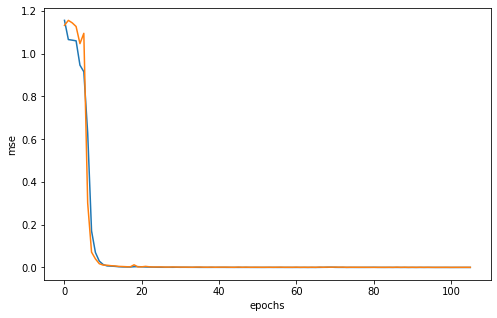

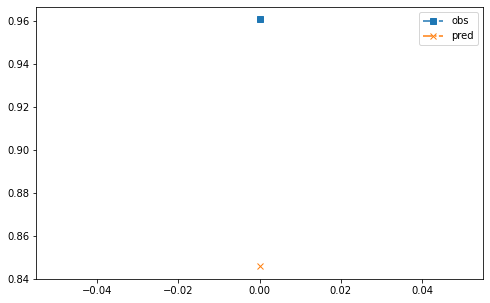

<Figure size 576x360 with 0 Axes>

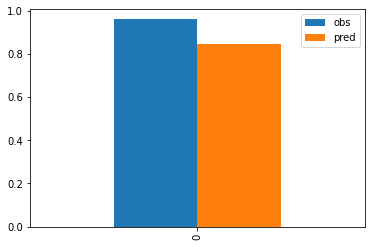

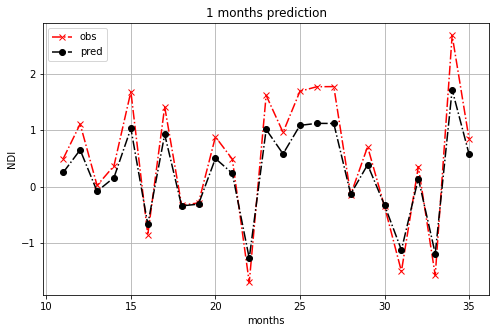

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


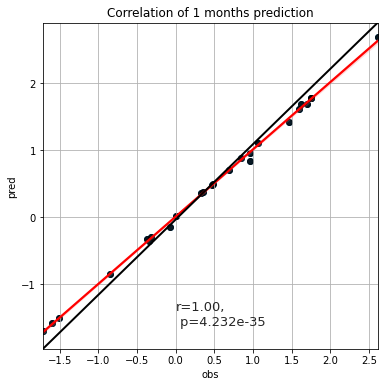

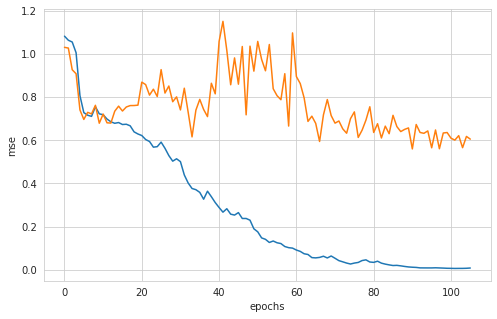

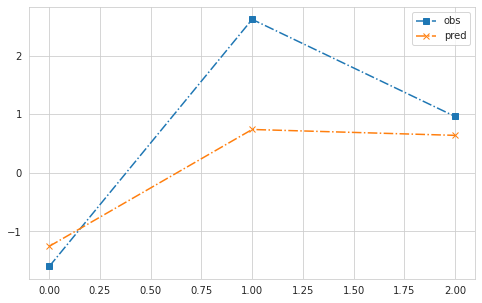

<Figure size 576x360 with 0 Axes>

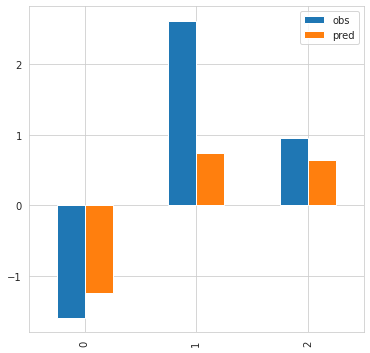

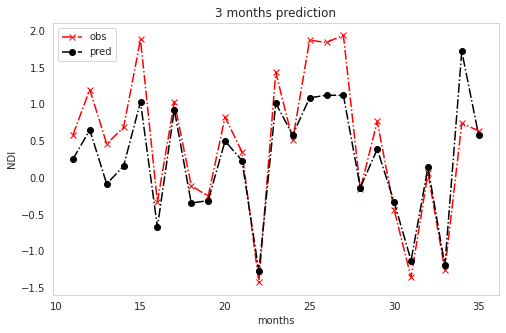

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


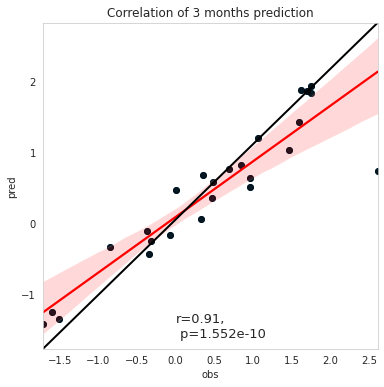

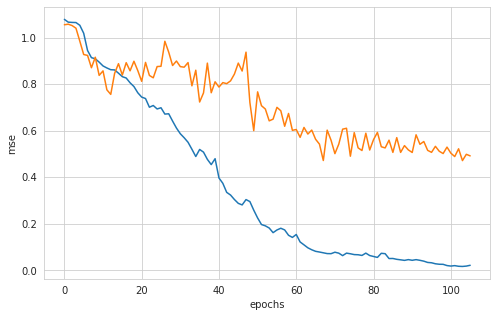

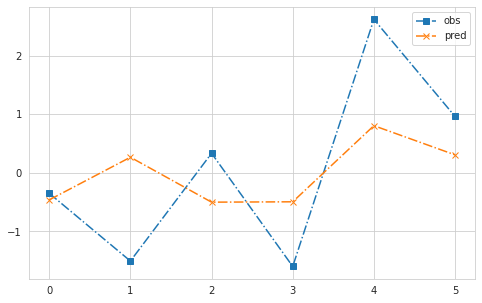

<Figure size 576x360 with 0 Axes>

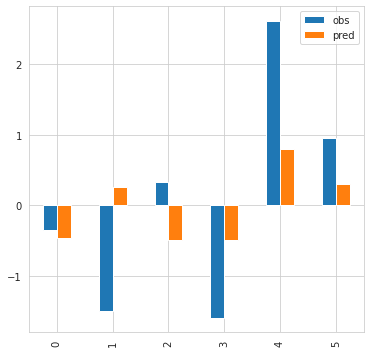

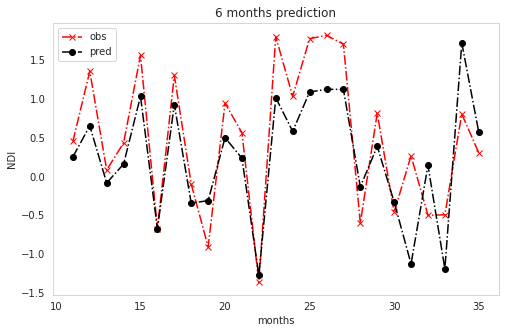

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


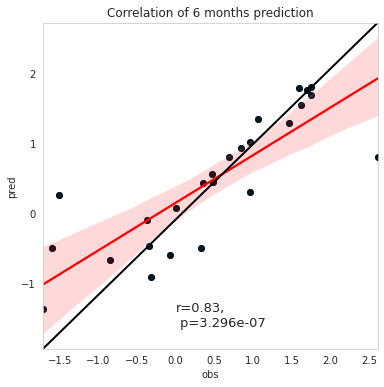

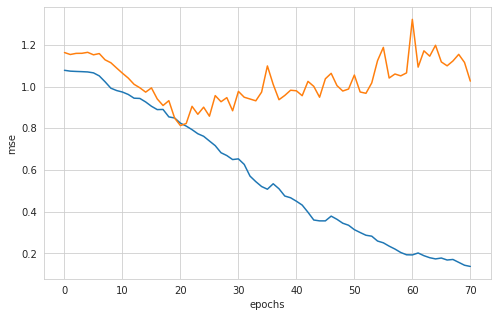

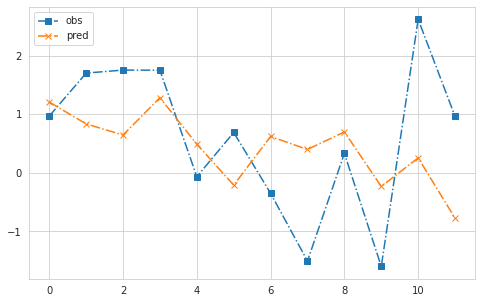

<Figure size 576x360 with 0 Axes>

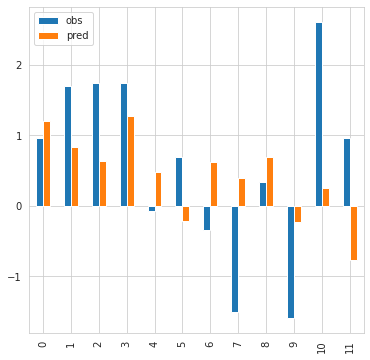

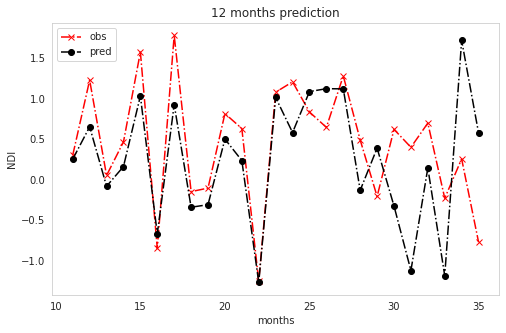

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


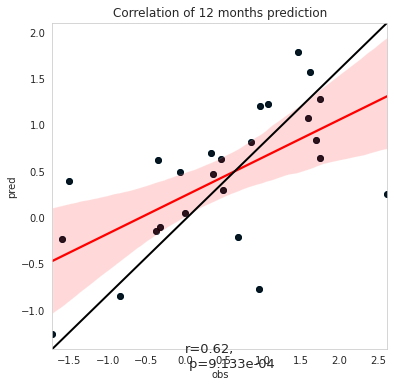

In [8]:
# scale data về 0, 1 trước khi chia dữ liệu

#https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# # create scaler
# scaler = MinMaxScaler([0,1])
# # scaler = StandardScaler()
# # fit and transform in one step
# normalized = scaler.fit_transform(dataset)
# # inverse transform
# inverse = scaler.inverse_transform(normalized)

# # 
# # split data into train and test
# dataset=normalized
# dataset_train=dataset[0:31*12,:]
# dataset_val=dataset[29*12:32*12,:]
# dataset_test=dataset[33*12:,:]
# # choose a number of time steps
# n_steps_in, n_steps_out = 24,12
# # covert into input/output
# Xtrain, ytrain = split_sequences(dataset_train, n_steps_in, n_steps_out)
# Xval, yval = split_sequences(dataset_val, n_steps_in, n_steps_out)
# Xtest, ytest = split_sequences(dataset_test, n_steps_in, n_steps_out)
# # the dataset knows the number of features, e.g. 2
# # scaled data mô hình không hiệu quả?

# scale theo vi du cua tensorflow
train_mean = dataset_train.mean()
train_std = dataset_train.std()

val_mean = dataset_val.mean()
val_std = dataset_val.std()
####################################################
test_mean = dataset_test.mean()
test_std = dataset_test.std()
# cai goc la scale theo train thoi
train_df = (dataset_train - train_mean) / train_std
val_df = (dataset_val - train_mean) / train_std
test_df = (dataset_test - train_mean) / train_std
#####################################################

# # minh sua lai scale tung cai
# train_df = (dataset_train - train_mean) / train_std
# val_df = (dataset_val - val_mean) / val_std
# test_df = (dataset_test - test_mean) / test_std
# scale tung cai rieng
####################################################

# # scale theo maxmin về 1,0 để dễ sử dụng các acctivation
# # scale theo vi du cua tensorflow
# train_max = dataset_train.max()
# train_min = dataset_train.min()

# val_mean = dataset_val.mean()
# val_std = dataset_val.std()

# test_mean = dataset_test.mean()
# test_std = dataset_test.std()
###############################################################
# # cai goc la scale theo train thoi
# train_df = (dataset_train - train_min) / (train_max-train_min)
# val_df = (dataset_val - train_min) / (train_max-train_min)
# test_df = (dataset_test - train_min) / (train_max-train_min)
##############################################################
# # Khong scale gì hết bà nội mày
# train_df=dataset_train
# val_df=dataset_val
# test_df=dataset_test
# ##############################################################

# 
# choose a number of time steps
#################################################################################
n_steps_in=12
correll_all=list()
y_org_all=list()
yhat_org_all=list()

for n_steps_out in [1,3,6,12]:

  #  n_steps_out = 6

  #################################################################################
  # covert into input/output
  Xtrain, ytrain = split_sequences(train_df, n_steps_in, n_steps_out)
  Xval, yval = split_sequences(val_df, n_steps_in, n_steps_out)
  Xtest, ytest = split_sequences(test_df, n_steps_in, n_steps_out)

  #
  import tensorflow as tf
  patience0=50
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience0,
                                                      mode='min')
  learing_rate0=0.01
  beta_1_0=0.9
  beta_2_0=0.999
  epsilon_0=1e-07


  n_features = Xtrain.shape[2]
  # define model
  KK.clear_session()
  model = Sequential()
  model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
  model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
  model.add(LSTM(100, activation='relu'))
  model.add(Dense(n_steps_out))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=learing_rate0, 
                                              beta_1=beta_1_0, 
                                              beta_2=beta_2_0,
                                              epsilon=epsilon_0, 
                                              amsgrad=True),
                
                loss='mse')
  # fit model
  history=model.fit(Xtrain, ytrain,epochs=106, verbose=0,validation_data=(Xval,yval),
                    batch_size=32,
                    callbacks=[early_stopping])


  # demonstrate prediction
  x_input = Xtest
  x_input = x_input.reshape((Xtest.shape[0], n_steps_in, n_features))
  yhat = model.predict(x_input, verbose=0)
  # print(yhat)
  import matplotlib.pyplot as plt
  # plot train processing
  fig=plt.Figure()
  plt.figure(figsize=(8, 5))
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='val')
  plt.xlabel('epochs')
  plt.ylabel('mse')
  plt.show()
  plt.close(fig)
  # plot compare testing
  fig=plt.Figure()
  plt.figure(figsize=(8, 5))
  plt.plot(ytest[-1,:],'-.s')
  plt.plot(yhat[-1,:],'-.x')
  plt.legend(["obs","pred"])
  plt.show()
  plt.close(fig)
  fig=plt.Figure()
  plt.figure(figsize=(8, 5))
  df_results=pd.DataFrame({'obs':ytest[-1,:],'pred':yhat[-1,:]})
  df_results.plot(kind='bar')
  # print(df_results)
  plt.show()
  plt.close(fig)
  # from scipy.stats import pearsonr
  # fig3=plt.Figure(figsize=(6, 6))
  # # plt.rcParams['figure.figsize'] = 6, 6

  # sns.set_style("whitegrid")
  # #calculate correlation coefficient
  # corr = pearsonr(np.array(ytest[-1,:].flatten()), np.array(yhat[-1,:].flatten()))
  # # corr = [np.round(c, 2) for c in corr]
  # #add the coefficient to your graph
  # text = 'r=%4.2f,\n p=%4.3e' % (corr[0], corr[1])
  # plt.scatter(np.array(ytest[-1,:].flatten()), np.array(yhat[-1,:].flatten()))
  # sns.regplot(np.array(ytest[-1,:].flatten()),np.array(yhat[-1,:].flatten()),
  #         scatter_kws={"color": "black"}, line_kws={"color": "red"})
  # plt.title("Compare prediction and observation")
  # plt.text(0,np.array(yhat[-1,:].flatten()).min()+0.1, text, fontsize=13)
  #plot scater plot prediction
  import matplotlib.lines as mlines
  import matplotlib.transforms as mtransforms
  from scipy.stats import pearsonr
  import numpy as np

  # fig,ax=plt.subplot()
  # plt.rcParams['figure.figsize'] = 6, 6
  # fig, ax = plt.subplots()
  # sns.set_style("whitegrid")
  # #calculate correlation coefficient
  # corr = pearsonr(np.array(ytest[:,:].flatten()), np.array(yhat[:,:].flatten()))
  # # corr = [np.round(c, 2) for c in corr]
  # #add the coefficient to your graph
  # text = 'r=%4.2f,\n p=%4.3e' % (corr[0], corr[1])
  # plt.scatter(np.array(ytest[:,:].flatten()), np.array(yhat[:,:].flatten()))
  # sns.regplot(np.array(ytest[:,:].flatten()),np.array(yhat[:,:].flatten()),
  #         scatter_kws={"color": "black"}, line_kws={"color": "red"})
  # plt.title("Compare prediction and observation")
  # plt.text(0,np.array(yhat[:,:].flatten()).min()+0.1, text, fontsize=13)

  # line = mlines.Line2D([0, 1], [0, 1],linewidth=2, color='black')
  # transform = ax.transAxes
  # line.set_transform(transform)
  # ax.add_line(line)
  


  # plt.tight_layout
  # ytest org
  y_org=list(ytest[:,0])
  for i in range(1,ytest.shape[1]):
    y_org.append(ytest[:,i][-1])
  y_org_all.append(str(n_steps_out))
  y_org_all.append(y_org)
  # yhat org
  
  yhat_org=list(yhat[:,0])
  for i in range(1,yhat.shape[1]):
    yhat_org.append(yhat[:,i][-1])
  yhat_org_all.append(str(n_steps_out))  
  yhat_org_all.append(yhat_org)
  fig=plt.Figure()
  plt.rcParams['figure.figsize'] = 8, 5


  plt.plot(np.arange(0+n_steps_in-1,len(yhat_org)+n_steps_in-1),yhat_org,'-.x',color='red') # prediction
  # plt.plot(np.arange(0+n_steps_in-1,len(y_org)+n_steps_in-1),y_org,'-.x') # obs scaled
  plt.plot(np.arange(0+n_steps_in-1,len(dataset_test[:,-1])),dataset_test[n_steps_in-1:,-1],'-.o',color='black') # obs 
  plt.legend(['obs','pred'])
  plt.title(str(n_steps_out)+' months prediction')
  plt.xlabel('months')
  plt.ylabel('NDI')
  plt.grid(None)
  plt.savefig(out_dir_all[0]+'/'+str(n_steps_in)+'_'+str(n_steps_out)+'pred.png')
  plt.show()
  plt.close(fig)
  # fig3,ax=plt.subplot()
  plt.rcParams['figure.figsize'] = 6, 6
  fig, ax = plt.subplots()
  sns.set_style("whitegrid")
  #calculate correlation coefficient
  corr = pearsonr(np.array(y_org), np.array(yhat_org))
  correll_all.append(str(n_steps_out))
  correll_all.append(corr[0])
  # corr = [np.round(c, 2) for c in corr]
  #add the coefficient to your graph
  text = 'r=%4.2f,\n p=%4.3e' % (corr[0], corr[1])
  plt.scatter(np.array(y_org), np.array(yhat_org))
  sns.regplot(np.array(y_org), np.array(yhat_org),
          scatter_kws={"color": "black"}, line_kws={"color": "red"})
  plt.title("Compare prediction and observation")
  plt.text(0,np.array(y_org).min()+0.1, text, fontsize=13)

  line = mlines.Line2D([0, 1], [0, 1],linewidth=2, color='black')
  transform = ax.transAxes
  line.set_transform(transform)
  plt.title('Correlation of '+str(n_steps_out)+' months prediction')
  ax.add_line(line)
  plt.xlabel('obs')
  plt.ylabel('pred')
  plt.grid(None)
  plt.savefig(out_dir_all[0]+'/'+str(n_steps_in)+'_'+str(n_steps_out)+'cor.png')
  plt.show()
  plt.close(fig)
  
  
  


#  Phần 4: Vẽ các hình chung với nhau

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths 

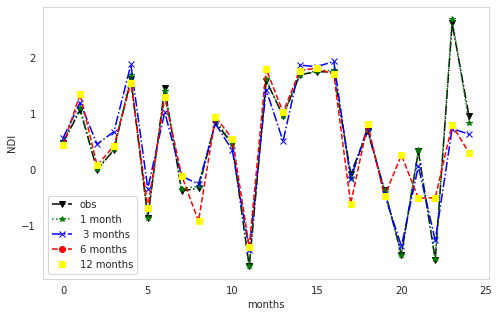

In [9]:
fig=plt.Figure()
plt.rcParams['figure.figsize'] = 8, 5
plt.plot(np.array(y_org_all).reshape(4,2)[0,:][1],'-.v',color='black',markersize=6)# obs
plt.plot(np.array(yhat_org_all).reshape(4,2)[0,:][1],':*',color='green',markersize=6) # 1 months
plt.plot(np.array(yhat_org_all).reshape(4,2)[1,:][1],'-.x',color='blue') # 3 months
plt.plot(np.array(yhat_org_all).reshape(4,2)[2,:][1],'--o',color='red') # 6 months
plt.plot(np.array(yhat_org_all).reshape(4,2)[2,:][1],'s',color='yellow')
plt.legend(['obs','1 month', ' 3 months', '6 months','12 months'])
plt.xlabel('months')
plt.ylabel('NDI')
plt.grid(None)
plt.savefig(out_dir_all[0]+'/'+str(n_steps_in)+'_'+str(n_steps_out)+'sosanh.png')
plt.show()
plt.close(fig)

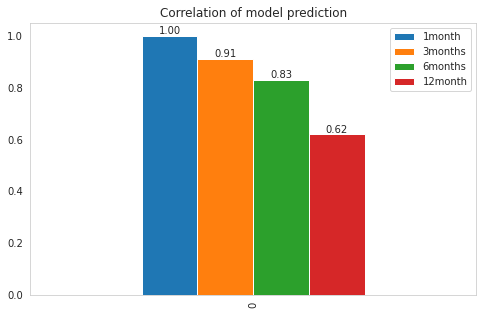

In [10]:
corr_arr=np.array(correll_all).reshape(4,2)
corr_arr
corr_arr[0,1]
corr_list={'1 month':corr_arr[0,1],
           '3 month':corr_arr[1,1],
           '6 month':corr_arr[2,1],
           '12 month':corr_arr[3,1]}

data=corr_arr[:,1].tolist()

data1=[float(i) for i in data]
data2=np.round(data1,2)
data2
cor_df = pd.DataFrame(columns=['1month','3months','6months','12month'])
cor_df.loc[0]=data2
cor_df
fig=plt.Figure()
ax=cor_df.plot(kind='bar')
labels = ["%0.2f" % i for i in data1]
# ax=plt.bar(x + 0.17, test_mae, width, label='Test')
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 0, label,
            ha='center', va='bottom')
plt.grid(None)
plt.title('Correlation of model prediction')
plt.savefig(out_dir_all[0]+'/'+str(n_steps_in)+'_'+str(n_steps_out)+'correllation.png')
plt.show()
plt.close(fig)


In [12]:
# # import numpy as np
# # import pandas as pd
# # import matplotlib.pyplot as plt
# # import seaborn as sns
 
# sns.set_context('paper')

# # # load dataset
# # titanic = sns.load_dataset('titanic')
# # print(titanic.head())

# # create plot
# sns.barplot(x = 'sex', y = 'survived', hue = 'class', data = titanic,
#             palette = 'hls',
#             order = ['male', 'female'],  
#             capsize = 0.05,             
#             saturation = 8,             
#             errcolor = 'gray', errwidth = 2,  
#             ci = 'sd'   
#             )

# print(titanic.groupby(['sex', 'class']).mean()['survived'])
# print(titanic.groupby(['sex', 'class']).std()['survived'])

# plt.show()
# plt.close(fig)

# In cac hinh ra

In [13]:
from keras.utils.vis_utils import plot_model
n_features = Xtrain.shape[2]
# define model
KK.clear_session()
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learing_rate0, 
                                            beta_1=beta_1_0, 
                                            beta_2=beta_2_0,
                                            epsilon=epsilon_0, 
                                            amsgrad=True),
              
              loss='mse')

fig=plt.Figure()
plot_model(model,to_file=out_dir_all[0]+'/'+str(n_steps_in)+'_'+str(n_steps_out)+'model.png',
           show_shapes=True, show_dtype=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)
plt.show()
plt.close(fig)